In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [416]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\Kabir\Mobile-Price-Prediction-cleaned_data.csv")
df

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [418]:
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [419]:
df.duplicated().sum()

264

In [420]:
df.drop_duplicates(inplace = True)

In [421]:
from sklearn.linear_model import LinearRegression

In [422]:
lin_reg = LinearRegression()

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
X = df.iloc[:,:-1]
y = df['Price']

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [426]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [427]:
lin_ypred = lin_reg.predict(X_test)

In [428]:
from sklearn.metrics import *

In [429]:
rmse = mean_squared_error(y_test, lin_ypred, squared=False)
r2 = r2_score(y_test, lin_ypred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 11485.1201380883
R²: 0.5869834334431232


In [430]:
print("Avg SalePrice:", y_test.mean())

Avg SalePrice: 11624.119266055046


In [431]:
from xgboost import XGBRegressor

In [432]:
# xgb = XGBRegressor(
#     n_estimators=1000,
#     learning_rate=0.01,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     verbose=False
# )

In [433]:
xgb = XGBRegressor(random_state = 0)

In [434]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [435]:
xgb_ypred = xgb.predict(X_test)

In [436]:
r2 = r2_score(y_test, xgb_ypred)

In [437]:
print("R²:", r2)

R²: 0.8921880722045898


In [471]:
final_model = XGBRegressor(learning_rate=0.1,n_estimators=1000,early_stopping_rounds=20,eval_metric='rmse',random_state=42)

In [473]:
final_model.fit(X_train, y_train, eval_set=[(X_test,y_test)],verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [474]:
pred = final_model.predict(X_test)
r2_score(pred,y_test)

0.9001822471618652

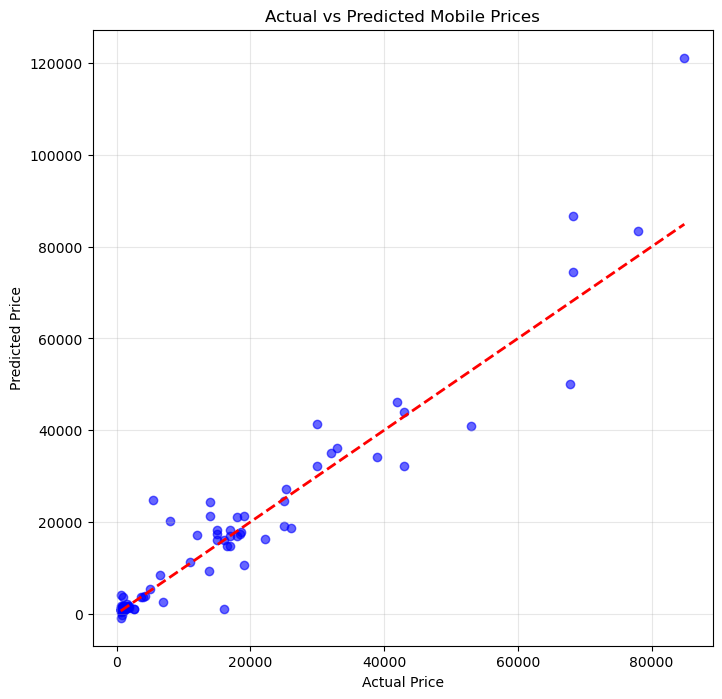

In [479]:
y_pred = xgb.predict(X_test)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Mobile Prices')
plt.grid(True, alpha=0.3)
plt.show()